In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import discriminant_analysis

In [3]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Data Visualization:

In [4]:
df= pd.read_csv('Ionosphere.csv')

In [5]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [6]:
df.shape

(351, 35)

In [7]:
df['label'].unique()

array(['g', 'b'], dtype=object)

In [11]:
df['feature1'].unique()

array([1, 0], dtype=int64)

In [12]:
df['feature2'].unique()

array([0], dtype=int64)

In [13]:
df = df.drop(columns='feature2', axis=1)

In [8]:
df.isnull().sum().sum()

0

In [9]:
x = dict(df['label'].value_counts())
print(x)

{'g': 225, 'b': 126}


In [15]:
df.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [16]:
df.shape

(351, 34)

In [17]:
X = df.drop(columns='label', axis=1)
y = df['label']

In [19]:
x2 = dict(df['feature1'].value_counts())
print(x2)

{1: 313, 0: 38}


In [18]:
X.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


## Applying QDA:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [21]:
model = discriminant_analysis.QuadraticDiscriminantAnalysis()

In [22]:
model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

## Checking Performance:

In [23]:
expected_y  = y_test

In [24]:
predicted_y = model.predict(X_test)

In [25]:
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           b       0.92      0.92      0.92        26
           g       0.96      0.96      0.96        45

    accuracy                           0.94        71
   macro avg       0.94      0.94      0.94        71
weighted avg       0.94      0.94      0.94        71



In [26]:
cm = metrics.confusion_matrix(expected_y, predicted_y)

<AxesSubplot:>

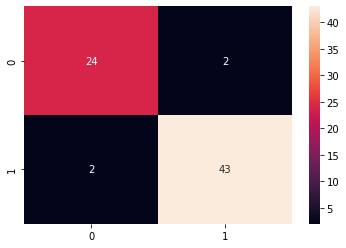

In [27]:
sns.heatmap(cm , annot=True)

In [28]:
t = model.score(X_test,y_test)*100
t

94.36619718309859

In [29]:
model.predict_proba(X_test)

array([[8.13987286e-047, 1.00000000e+000],
       [1.42454566e-033, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [2.63703189e-013, 1.00000000e+000],
       [1.00000000e+000, 4.23513015e-069],
       [4.60853711e-044, 1.00000000e+000],
       [1.00000000e+000, 1.67455366e-017],
       [1.58054477e-028, 1.00000000e+000],
       [4.78021618e-032, 1.00000000e+000],
       [2.13025608e-036, 1.00000000e+000],
       [5.26988768e-029, 1.00000000e+000],
       [1.12841752e-046, 1.00000000e+000],
       [4.38586452e-022, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [6.87592059e-038, 1.00000000e+000],
       [2.11732145e-044, 1.00000000e+000],
       [5.38021842e-026, 1.00000000e+000],
       [1.00000000e+000, 4.24121770e-167],
       [2.78477443e-032, 1.00000000e+000],
       [7.48052406e-017, 1.00000000e+000],
       [1.12759004e-028, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [7.52687125e-016, 1.00000000e+000],
       [2.0